In [2]:
import pandas as pd
import numpy as np
import scipy.io

from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.colors as colors

import weightedcalcs as wc

In [3]:
cntryname = ['AUS','AUT','BEL','CAN','DNK','FIN','FRA','DEU','GRC','ITA', 'JPN', 'NLD', 'NZL','NOR','PRT','ESP','SWE','GBR','USA']

In [4]:
dftrade = pd.read_csv("trade_model_efficient_data.csv")

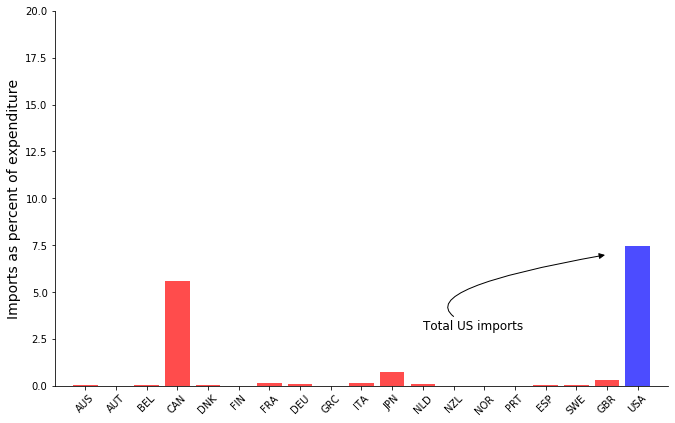

In [5]:
cntry = 19

foo = dftrade[dftrade.importer_index == cntry]

bar = foo[foo.exporter_index != cntry]

uscond = foo.exporter_index == cntry

fig, ax = plt.subplots(figsize = (11,6.9))

ax.bar(bar.exporter_index, 100*bar.trademodel,
       alpha = 0.70, color = "red")



ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xticks(np.arange(1,20))
ax.set_xticklabels(cntryname,rotation=45, fontsize = 10)

ax.set_ylabel("Imports as percent of expenditure", fontsize = 14)

ax.bar(foo[uscond].exporter_index, 100*(1-foo[uscond].trademodel),
       alpha = 0.70, color = "blue")

ax.set_xlim(0,20)
ax.set_ylim(0,20)

ax.annotate(
    "Total US imports", 
    xy=(18, 7), # This is where we point at...
    xycoords="data", # Not exactly sure about this
    xytext=(12, 3), # This is about where the text is
    horizontalalignment="left", # How the text is alined
    arrowprops={
        "arrowstyle": "-|>", # This is stuff about the arrow
        "connectionstyle": "angle3,angleA=340,angleB=10",
        "color": "black"
    },
    fontsize=12,
)

plt.savefig("../notes/figures/decentralized-trade-us.pdf", bbox_inches = "tight")

plt.show()

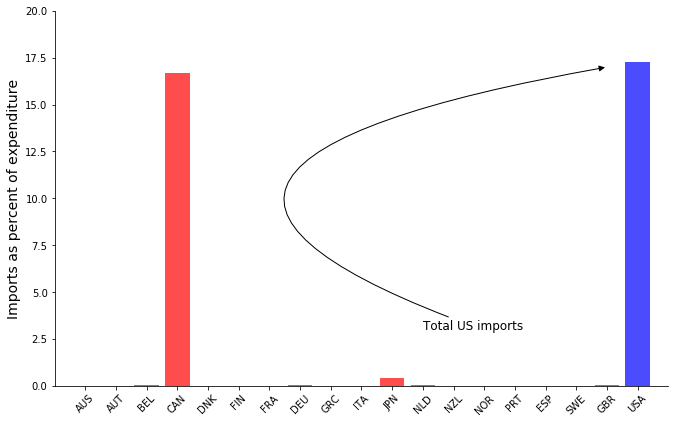

In [8]:
cntry = 19

foo = dftrade[dftrade.importer_index == cntry]

bar = foo[foo.exporter_index != cntry]

uscond = foo.exporter_index == cntry

fig, ax = plt.subplots(figsize = (11,6.9))

ax.bar(bar.exporter_index, 100*bar.trade_efficient,
       alpha = 0.70, color = "red")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xticks(np.arange(1,20))
ax.set_xticklabels(cntryname,rotation=45, fontsize = 10)

ax.set_ylabel("Imports as percent of expenditure", fontsize = 14)

ax.bar(foo[uscond].exporter_index, 100*(1-foo[uscond].trade_efficient),
       alpha = 0.70, color = "blue")

ax.set_xlim(0,20)
ax.set_ylim(0,20)

ax.annotate(
    "Total US imports", 
    xy=(18, 17), # This is where we point at...
    xycoords="data", # Not exactly sure about this
    xytext=(12, 3), # This is about where the text is
    horizontalalignment="left", # How the text is alined
    arrowprops={
        "arrowstyle": "-|>", # This is stuff about the arrow
        "connectionstyle": "angle3,angleA=340,angleB=10",
        "color": "black"
    },
    fontsize=12,
)

plt.savefig("../notes/figures/planner-trade-us.pdf", bbox_inches = "tight")

plt.show()

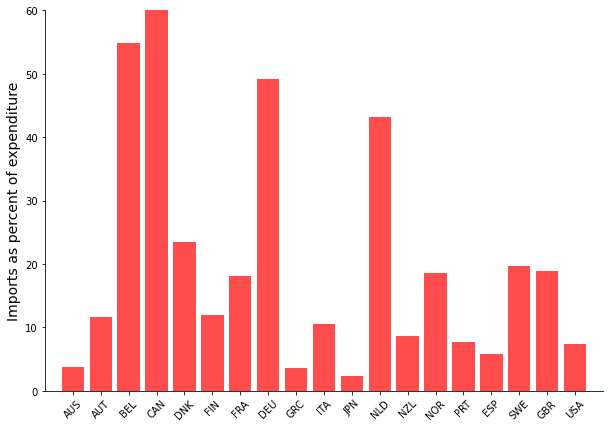

In [110]:
foo = dftrade[dftrade.importer_index == dftrade.exporter_index]

fig, ax = plt.subplots(figsize = (10,7))

ax.bar(foo.exporter_index, 100*(1 - foo.trademodel),
       alpha = 0.70, color = "red")

ax.set_xlim(0,20)
ax.set_ylim(0,60)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xticks(np.arange(1,20))
ax.set_xticklabels(cntryname,rotation=45, fontsize = 10)

ax.set_ylabel("Imports as percent of expenditure", fontsize = 14)

plt.show()

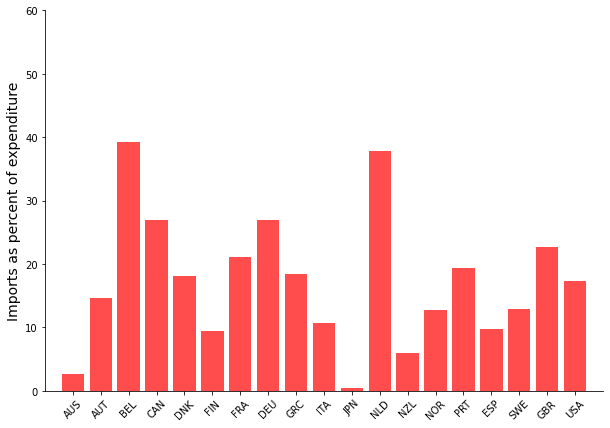

In [182]:
foo = dftrade[dftrade.importer_index == dftrade.exporter_index]

fig, ax = plt.subplots(figsize = (10,7))

ax.set_xlim(0,20)
ax.set_ylim(0,60)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xticks(np.arange(1,20))
ax.set_xticklabels(cntryname,rotation=45, fontsize = 10)

ax.set_ylabel("Imports as percent of expenditure", fontsize = 14)

ax.bar(foo.exporter_index, 100*(1 - foo.trade_efficient),
       alpha = 0.70, color = "red")

plt.show()

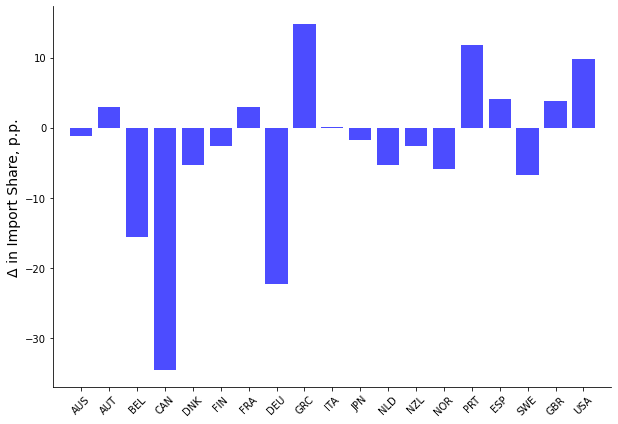

In [183]:
foo = dftrade[dftrade.importer_index == dftrade.exporter_index]

fig, ax = plt.subplots(figsize = (10,7))

ax.set_xlim(0,20)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xticks(np.arange(1,20))
ax.set_xticklabels(cntryname,rotation=45, fontsize = 10)

ax.set_ylabel("Δ in Import Share, p.p.", fontsize = 14)

ax.bar(foo.exporter_index,  100*(1 - foo.trade_efficient) - 100*(1 - foo.trademodel),
       alpha = 0.70, color = "blue")

plt.show()

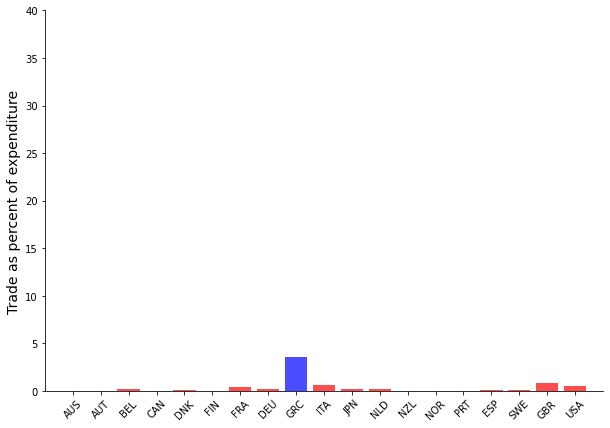

In [180]:
cntry = 9

foo = dftrade[dftrade.importer_index == cntry]

bar = foo[foo.exporter_index != cntry]

uscond = foo.exporter_index == cntry

fig, ax = plt.subplots(figsize = (10,7))

ax.bar(bar.exporter_index, 100*bar.trademodel,
       alpha = 0.70, color = "red")



ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xticks(np.arange(1,20))
ax.set_xticklabels(cntryname,rotation=45, fontsize = 10)

ax.set_ylabel("Trade as percent of expenditure", fontsize = 14)


ax.bar(foo[uscond].exporter_index, 100*(1-foo[uscond].trademodel),
       alpha = 0.70, color = "blue")



ax.set_xlim(0,20)
ax.set_ylim(0,40)


plt.show()

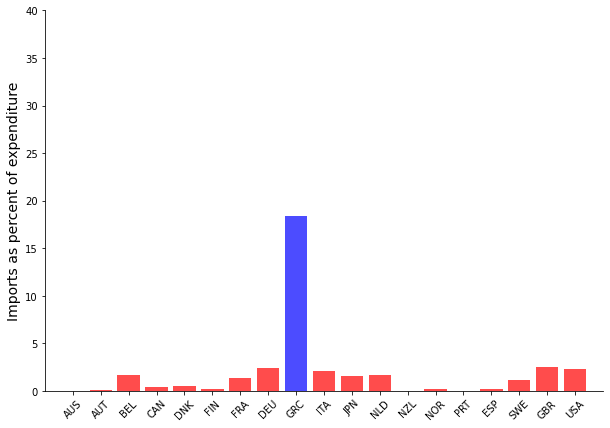

In [181]:
cntry = 9

foo = dftrade[dftrade.importer_index == cntry]

bar = foo[foo.exporter_index != cntry]

uscond = foo.exporter_index == cntry

fig, ax = plt.subplots(figsize = (10,7))

ax.bar(bar.exporter_index, 100*bar.trade_efficient,
       alpha = 0.70, color = "red")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xticks(np.arange(1,20))
ax.set_xticklabels(cntryname,rotation=45, fontsize = 10)

ax.set_ylabel("Imports as percent of expenditure", fontsize = 14)

ax.bar(foo[uscond].exporter_index, 100*(1-foo[uscond].trade_efficient),
       alpha = 0.70, color = "blue")



ax.set_xlim(0,20)
ax.set_ylim(0,40)

plt.show()